# Credit Card customer churn predictions

- source :- https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

- About:-
    - A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction
    - Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.
    - Aim is to train our model to find churn customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('data/BankChurners.csv')
df.head(3)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   

[3 rows x 23 columns]

In [4]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis = 1,inplace=True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis = 1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
df.head(2)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  

[2 rows x 21 columns]

In [9]:
df.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

In [10]:
df.duplicated().any()

False

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64


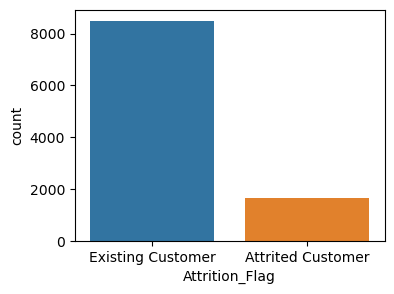

In [11]:
fig = plt.figure(figsize=(4,3))
print(df["Attrition_Flag"].value_counts(normalize=True))
_ = sns.countplot(x = "Attrition_Flag", data = df, order=df["Attrition_Flag"].value_counts().index)

# Exploratory Data Analysis

### Categorical Data Distribution

In [12]:
df.describe(include='O').T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

In [13]:
def plot_cat_col(dataframe,col_name, figsize = (15,5)):
    print("\t** COLUMN NAME : "+str(col_name)+" **\n")
    pd.set_option('display.float_format', '{:.2%}'.format)
    td_norm = dataframe[col_name].value_counts(normalize=True)
    td_group = dataframe.groupby('Attrition_Flag')[col_name].value_counts(normalize=True)
    print(td_group)
    # plot those values
    fig = plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    plt.pie(td_norm.values,labels=td_norm.index,autopct="%0.1f%%",radius=1.7);
    plt.subplot(1,2,2)
    g = sns.countplot(x=col_name, data = dataframe, hue='Attrition_Flag')
    for p in g.patches:
        txt = str(p.get_height())
        g.annotate(txt,(p.get_x()+0.01, p.get_height()+50))
    plt.tight_layout()
    plt.show()


	** COLUMN NAME : Gender **

Attrition_Flag     Gender
Attrited Customer  F        57.16%
                   M        42.84%
Existing Customer  F        52.09%
                   M        47.91%
Name: Gender, dtype: float64


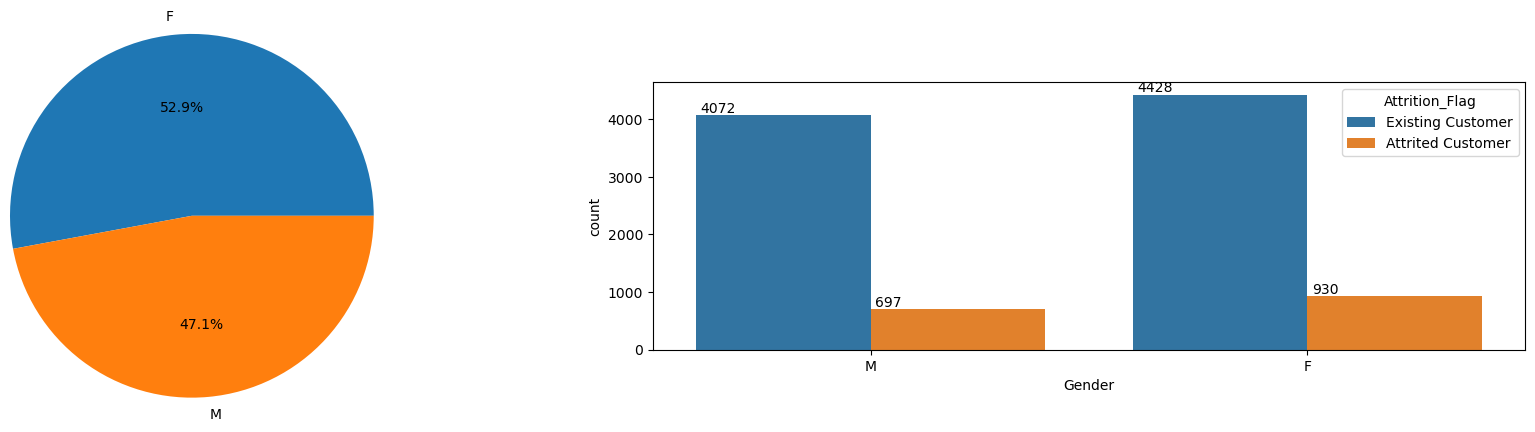

In [14]:
plot_cat_col(df,"Gender",figsize = (18,5))

	** COLUMN NAME : Education_Level **

Attrition_Flag     Education_Level
Attrited Customer  Graduate          29.93%
                   High School       18.81%
                   Unknown           15.73%
                   Uneducated        14.57%
                   College            9.47%
                   Doctorate          5.84%
                   Post-Graduate      5.65%
Existing Customer  Graduate          31.07%
                   High School       20.08%
                   Unknown           14.86%
                   Uneducated        14.71%
                   College           10.11%
                   Post-Graduate      4.99%
                   Doctorate          4.19%
Name: Education_Level, dtype: float64


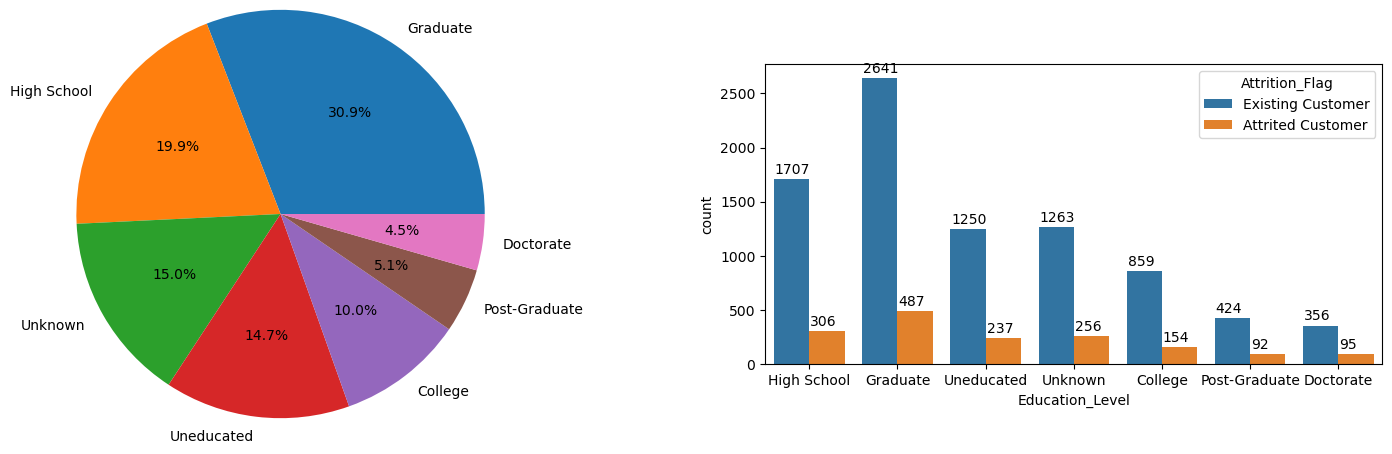

In [15]:
plot_cat_col(df,"Education_Level")

	** COLUMN NAME : Marital_Status **

Attrition_Flag     Marital_Status
Attrited Customer  Married          43.58%
                   Single           41.06%
                   Unknown           7.93%
                   Divorced          7.44%
Existing Customer  Married          46.80%
                   Single           38.53%
                   Divorced          7.38%
                   Unknown           7.29%
Name: Marital_Status, dtype: float64


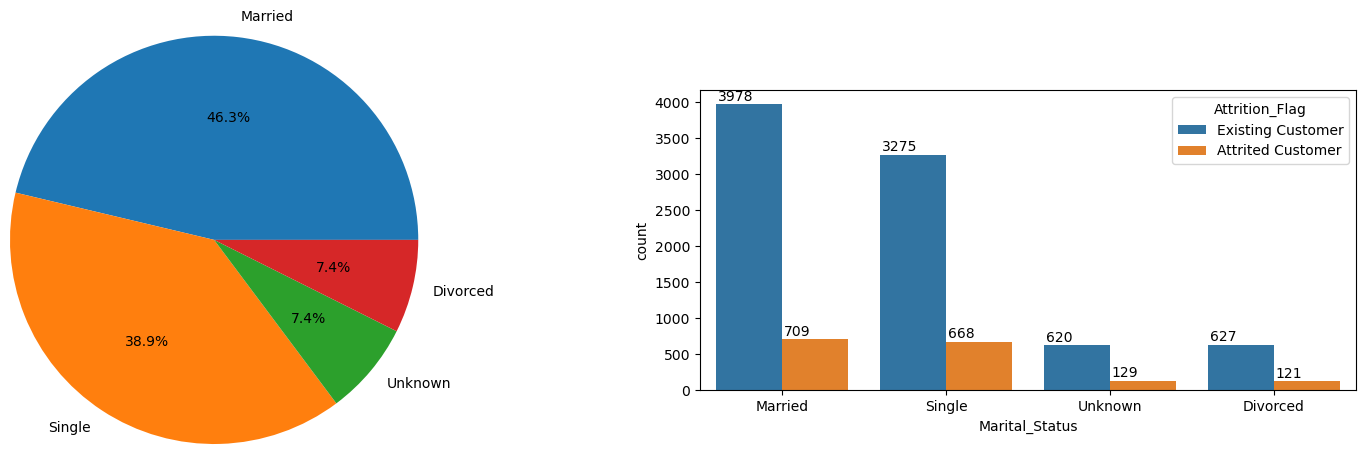

In [16]:
plot_cat_col(df,"Marital_Status")

	** COLUMN NAME : Card_Category **

Attrition_Flag     Card_Category
Attrited Customer  Blue            93.36%
                   Silver           5.04%
                   Gold             1.29%
                   Platinum         0.31%
Existing Customer  Blue            93.14%
                   Silver           5.56%
                   Gold             1.12%
                   Platinum         0.18%
Name: Card_Category, dtype: float64


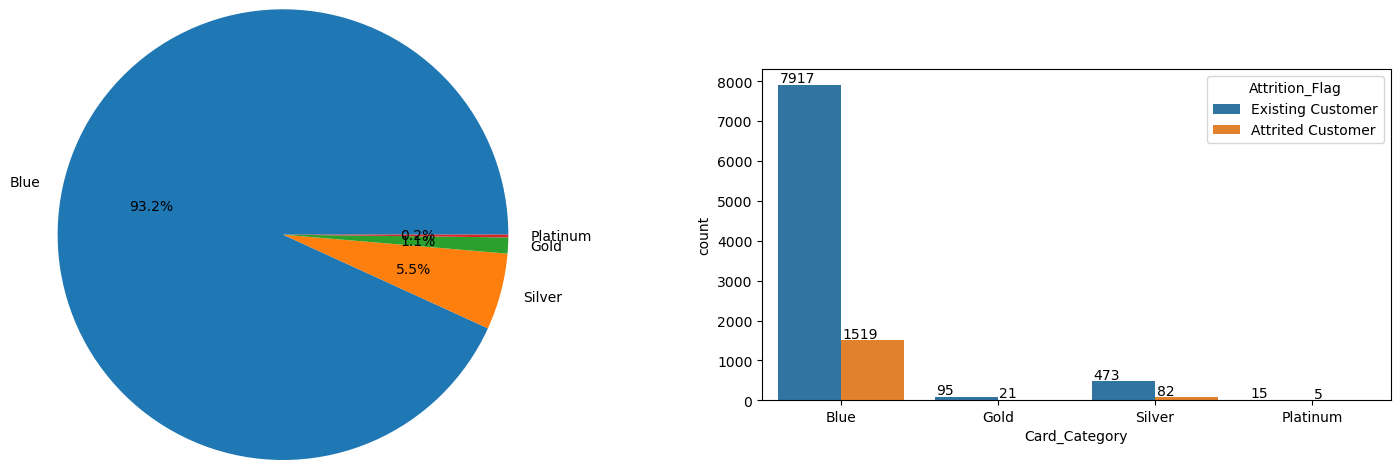

In [17]:
plot_cat_col(df,"Card_Category")

	** COLUMN NAME : Income_Category **

Attrition_Flag     Income_Category
Attrited Customer  Less than $40K    37.62%
                   $40K - $60K       16.66%
                   $80K - $120K      14.87%
                   $60K - $80K       11.62%
                   Unknown           11.49%
                   $120K +            7.74%
Existing Customer  Less than $40K    34.69%
                   $40K - $60K       17.87%
                   $80K - $120K      15.21%
                   $60K - $80K       14.27%
                   Unknown           10.88%
                   $120K +            7.07%
Name: Income_Category, dtype: float64


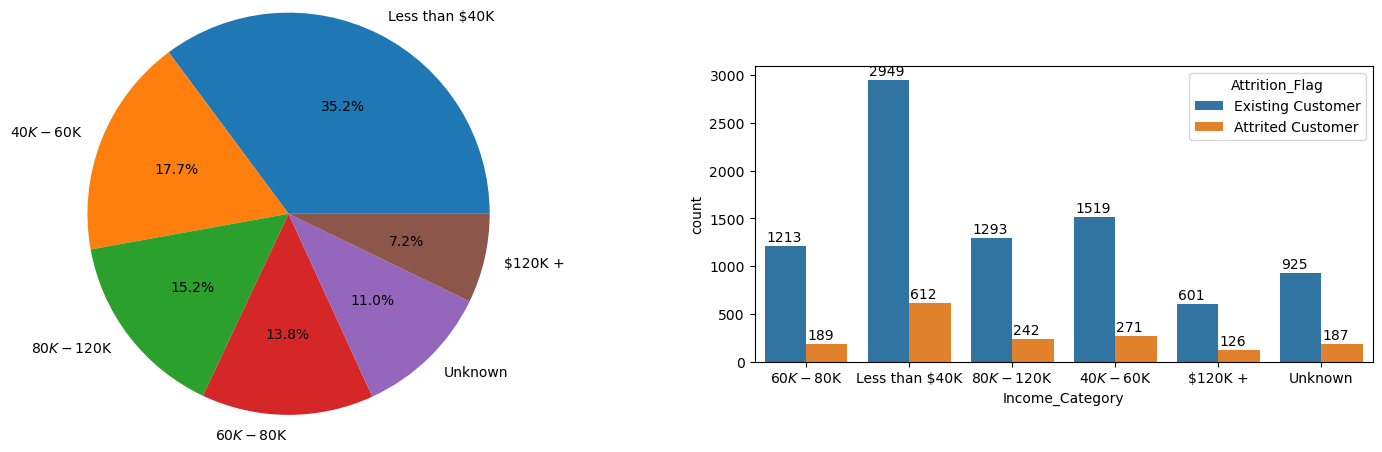

In [18]:
plot_cat_col(df,"Income_Category")

- unknown here is a NULL value 

#### Dataset Observations
- this data is highly biased for Blue card holder , as much of the data is from them
- we have higher graduation students


- gather insights based on cross columns , like how many graduated students are chunkers ,  how many married women are chunkers

In [19]:
print(len(df.columns))
df.columns

21


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

	** COLUMN NAME : Dependent_count **

Attrition_Flag     Dependent_count
Attrited Customer  3                 29.63%
                   2                 25.63%
                   1                 16.53%
                   4                 15.98%
                   0                  8.30%
                   5                  3.93%
Existing Customer  3                 26.47%
                   2                 26.33%
                   1                 18.46%
                   4                 15.46%
                   0                  9.05%
                   5                  4.24%
Name: Dependent_count, dtype: float64


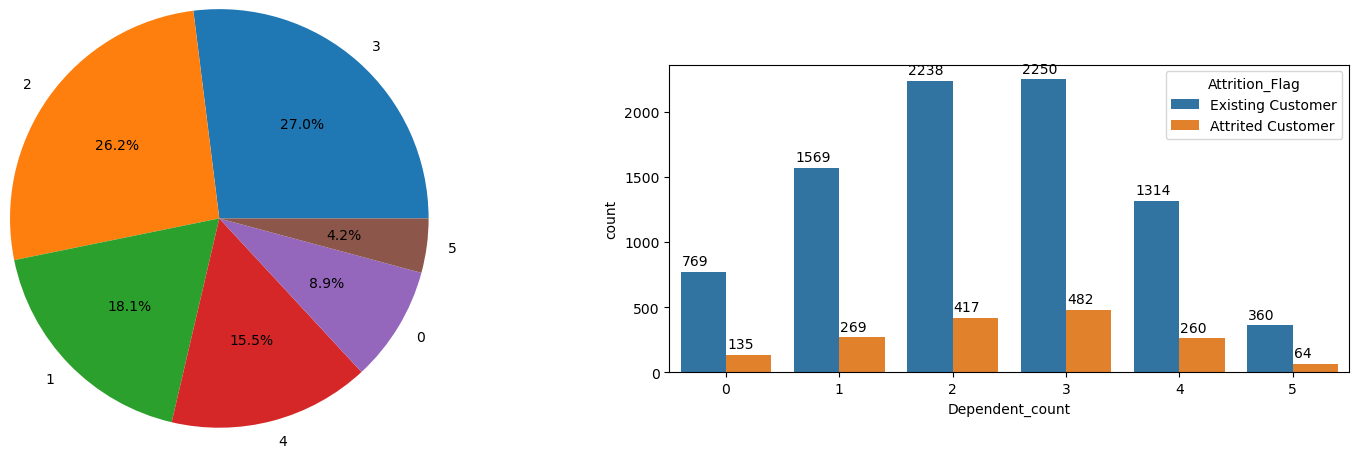

In [20]:
plot_cat_col(df,'Dependent_count')

	** COLUMN NAME : Total_Relationship_Count **

Attrition_Flag     Total_Relationship_Count
Attrited Customer  3                          24.59%
                   2                          21.27%
                   1                          14.32%
                   5                          13.95%
                   4                          13.83%
                   6                          12.05%
Existing Customer  3                          22.41%
                   4                          19.85%
                   6                          19.65%
                   5                          19.58%
                   2                          10.55%
                   1                           7.96%
Name: Total_Relationship_Count, dtype: float64


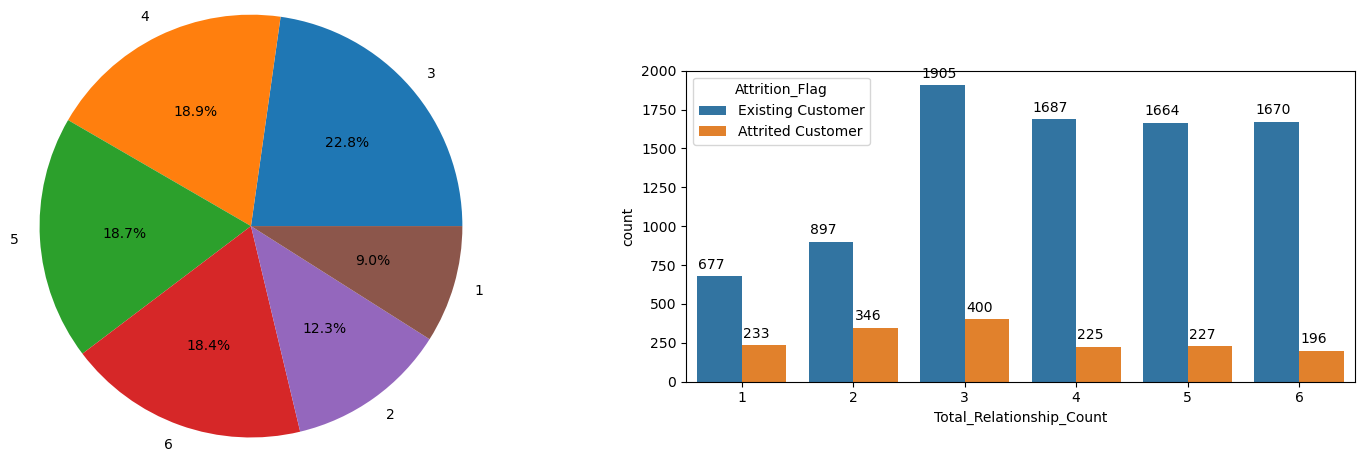

In [21]:
plot_cat_col(df,'Total_Relationship_Count')

	** COLUMN NAME : Months_Inactive_12_mon **

Attrition_Flag     Months_Inactive_12_mon
Attrited Customer  3                        50.77%
                   2                        31.04%
                   4                         7.99%
                   1                         6.15%
                   5                         1.97%
                   6                         1.17%
                   0                         0.92%
Existing Customer  3                        35.53%
                   2                        32.67%
                   1                        25.09%
                   4                         3.59%
                   5                         1.72%
                   6                         1.24%
                   0                         0.16%
Name: Months_Inactive_12_mon, dtype: float64


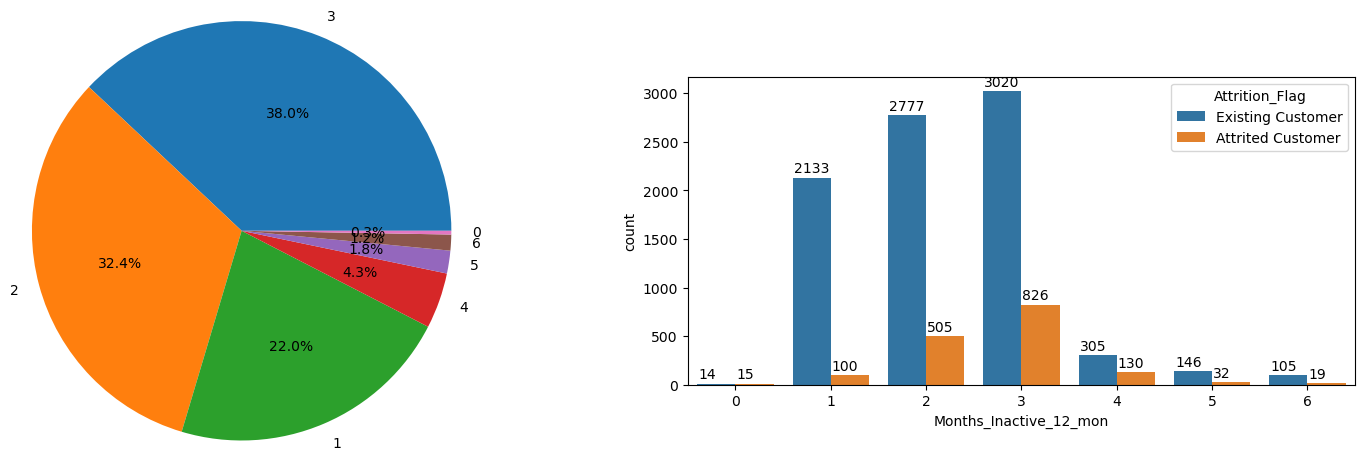

In [22]:
plot_cat_col(df,'Months_Inactive_12_mon')

	** COLUMN NAME : Contacts_Count_12_mon **

Attrition_Flag     Contacts_Count_12_mon
Attrited Customer  3                       41.86%
                   2                       24.77%
                   4                       19.36%
                   1                        6.64%
                   5                        3.63%
                   6                        3.32%
                   0                        0.43%
Existing Customer  2                       33.22%
                   3                       31.75%
                   1                       16.36%
                   4                       12.67%
                   0                        4.61%
                   5                        1.38%
Name: Contacts_Count_12_mon, dtype: float64


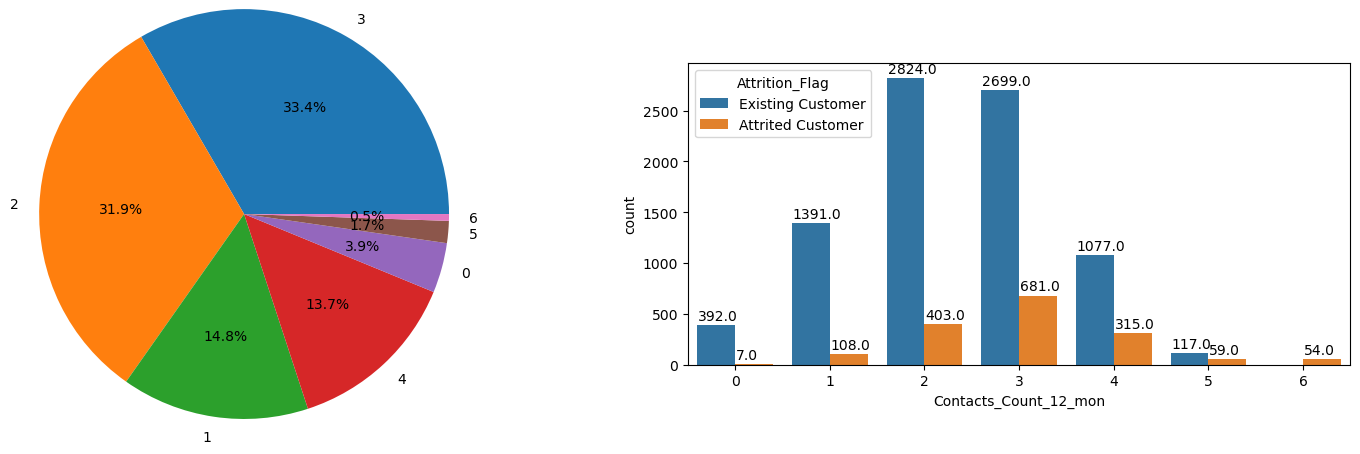

In [23]:
plot_cat_col(df,'Contacts_Count_12_mon')

### Continuous Data Distribution

In [24]:
td = df.describe(include=None).T
num_col = list(td.index)
print(num_col)
td

['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


count            mean            std  \
CLIENTNUM                1012700.00% 73917760633.37% 3690378345.02%   
Customer_Age             1012700.00%        4632.60%        801.68%   
Dependent_count          1012700.00%         234.62%        129.89%   
Months_on_book           1012700.00%        3592.84%        798.64%   
Total_Relationship_Count 1012700.00%         381.26%        155.44%   
Months_Inactive_12_mon   1012700.00%         234.12%        101.06%   
Contacts_Count_12_mon    1012700.00%         245.53%        110.62%   
Credit_Limit             1012700.00%      863195.37%     908877.67%   
Total_Revolving_Bal      1012700.00%      116281.41%      81498.73%   
Avg_Open_To_Buy          1012700.00%      746913.96%     909068.53%   
Total_Amt_Chng_Q4_Q1     1012700.00%          75.99%         21.92%   
Total_Trans_Amt          1012700.00%      440408.63%     339712.93%   
Total_Trans_Ct           1012700.00%        6485.87%       2347.26%   
Total_Ct_Chng_Q4_Q1      1012700.00%          71.22%         23.81%   
Avg_Utilization_Ratio    1012700.00%          27.49%         27.57%   

                                     min             25%             50%  \
CLIENTNUM                70808208300.00% 71303677050.00% 71792635800.00%   
Customer_Age                    2600.00%        4100.00%        4600.00%   
Dependent_count                    0.00%         100.00%         200.00%   
Months_on_book                  1300.00%        3100.00%        3600.00%   
Total_Relationship_Count         100.00%         300.00%         400.00%   
Months_Inactive_12_mon             0.00%         200.00%         200.00%   
Contacts_Count_12_mon              0.00%         200.00%         200.00%   
Credit_Limit                  143830.00%      255500.00%      454900.00%   
Total_Revolving_Bal                0.00%       35900.00%      127600.00%   
Avg_Open_To_Buy                  300.00%      132450.00%      347400.00%   
Total_Amt_Chng_Q4_Q1               0.00%          63.10%          73.60%   
Total_Trans_Amt                51000.00%      215550.00%      389900.00%   
Total_Trans_Ct                  1000.00%        4500.00%        6700.00%   
Total_Ct_Chng_Q4_Q1                0.00%          58.20%          70.20%   
Avg_Utilization_Ratio              0.00%           2.30%          17.60%   

                                     75%             max  
CLIENTNUM                77314353300.00% 82834308300.00%  
Customer_Age                    5200.00%        7300.00%  
Dependent_count                  300.00%         500.00%  
Months_on_book                  4000.00%        5600.00%  
Total_Relationship_Count         500.00%         600.00%  
Months_Inactive_12_mon           300.00%         600.00%  
Contacts_Count_12_mon            300.00%         600.00%  
Credit_Limit                 1106750.00%     3451600.00%  
Total_Revolving_Bal           178400.00%      251700.00%  
Avg_Open_To_Buy               985900.00%     3451600.00%  
Total_Amt_Chng_Q4_Q1              85.90%         339.70%  
Total_Trans_Amt               474100.00%     1848400.00%  
Total_Trans_Ct                  8100.00%       13900.00%  
Total_Ct_Chng_Q4_Q1               81.80%         371.40%  
Avg_Utilization_Ratio             50.30%          99.90%

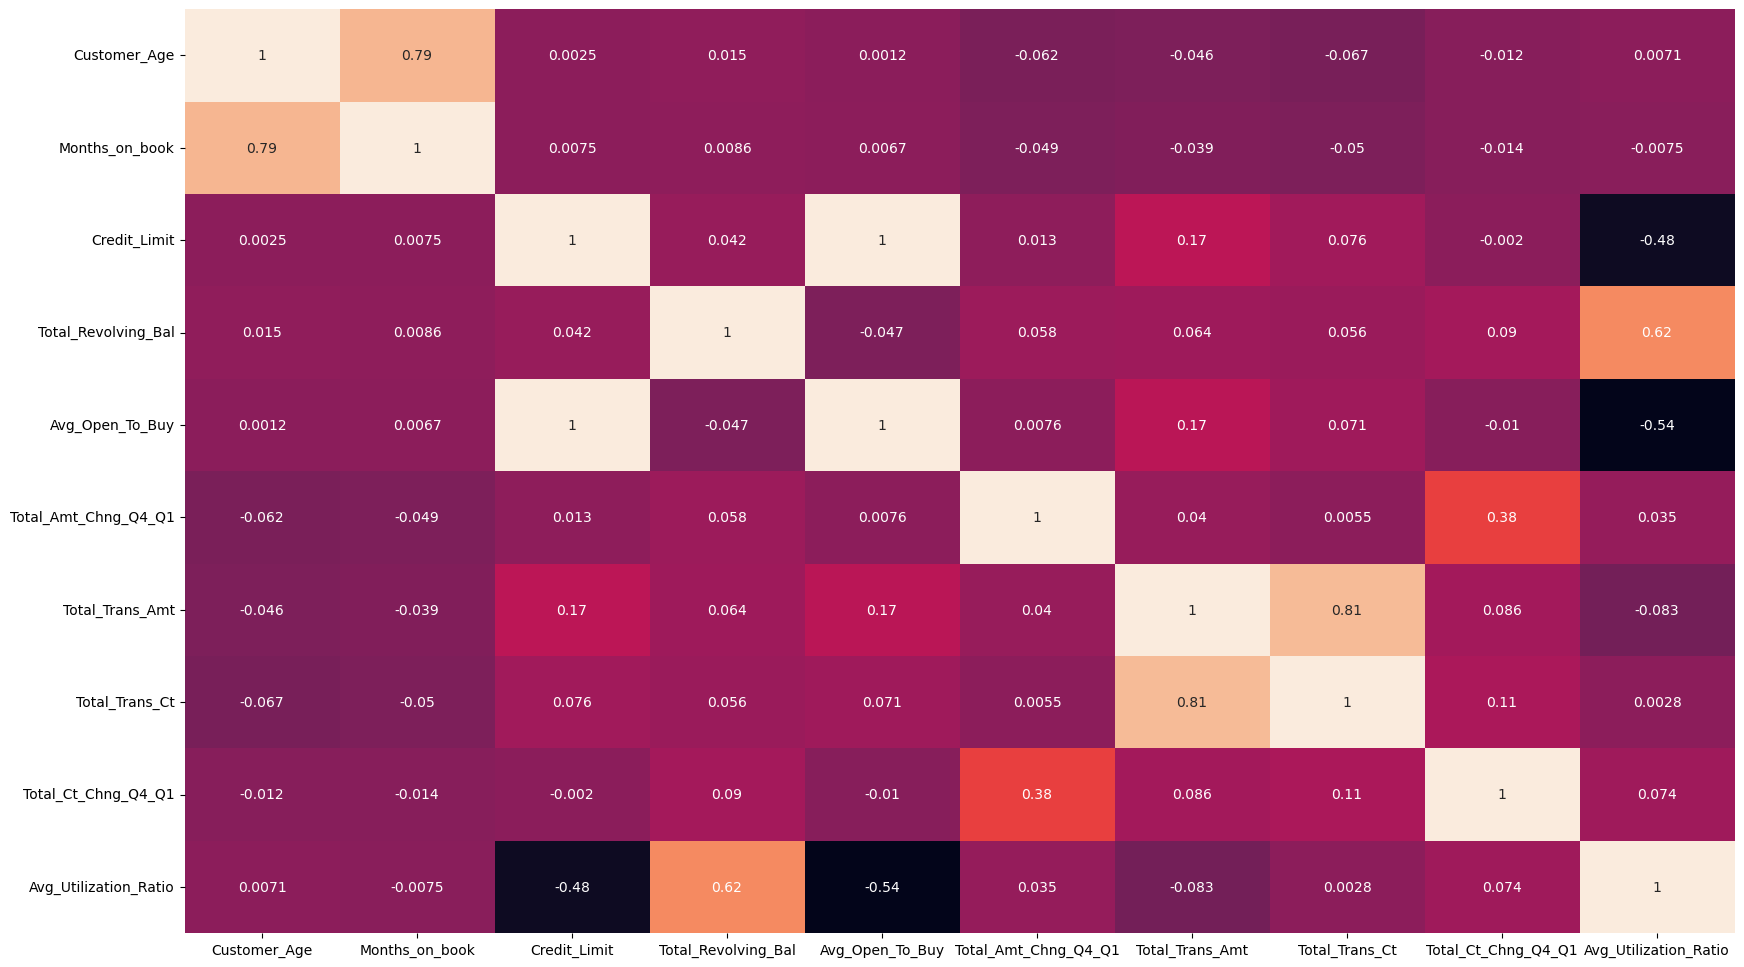

In [25]:
del_col = ['CLIENTNUM','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']
num_col = [i for i in num_col if i not in del_col]
fig = plt.figure(figsize=(20,12))
_ = sns.heatmap(df[num_col].corr(),cbar=False,annot=True)
plt.show()

In [26]:
def plot_num_col(dataframe,col_name, figsize = (15,8)):
    print("\t** COLUMN NAME : "+str(col_name)+" **\n")
    
    # plot those values
    fig = plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    _ = sns.histplot(data=dataframe,x=col_name,hue='Attrition_Flag',kde=True)
    plt.subplot(1,2,2)
    _ = sns.boxplot(x='Attrition_Flag',y=col_name,data=dataframe);
    plt.tight_layout()
    plt.show()


	** COLUMN NAME : Avg_Utilization_Ratio **



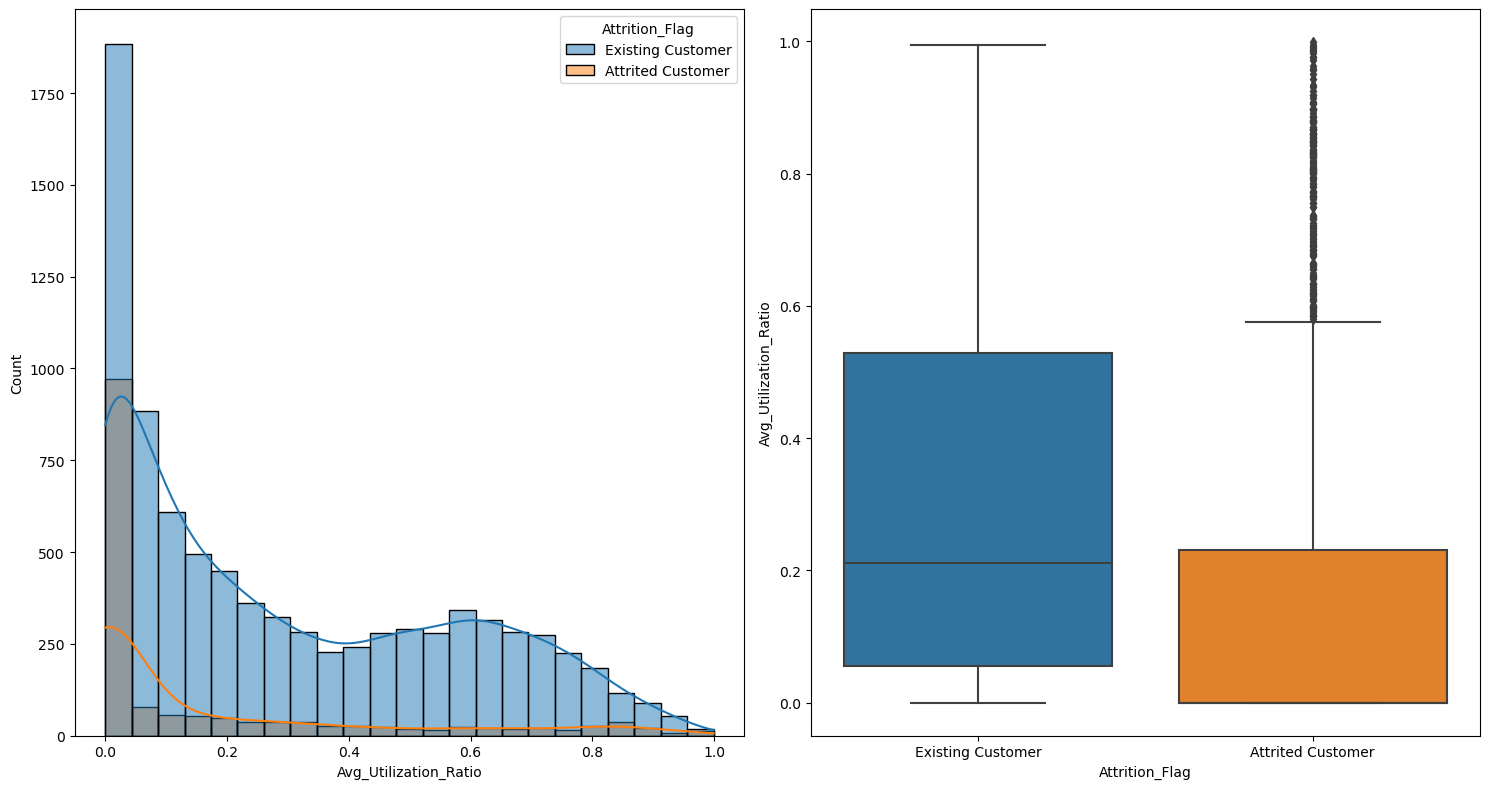

In [27]:
plot_num_col(df,'Avg_Utilization_Ratio')

	** COLUMN NAME : Customer_Age **



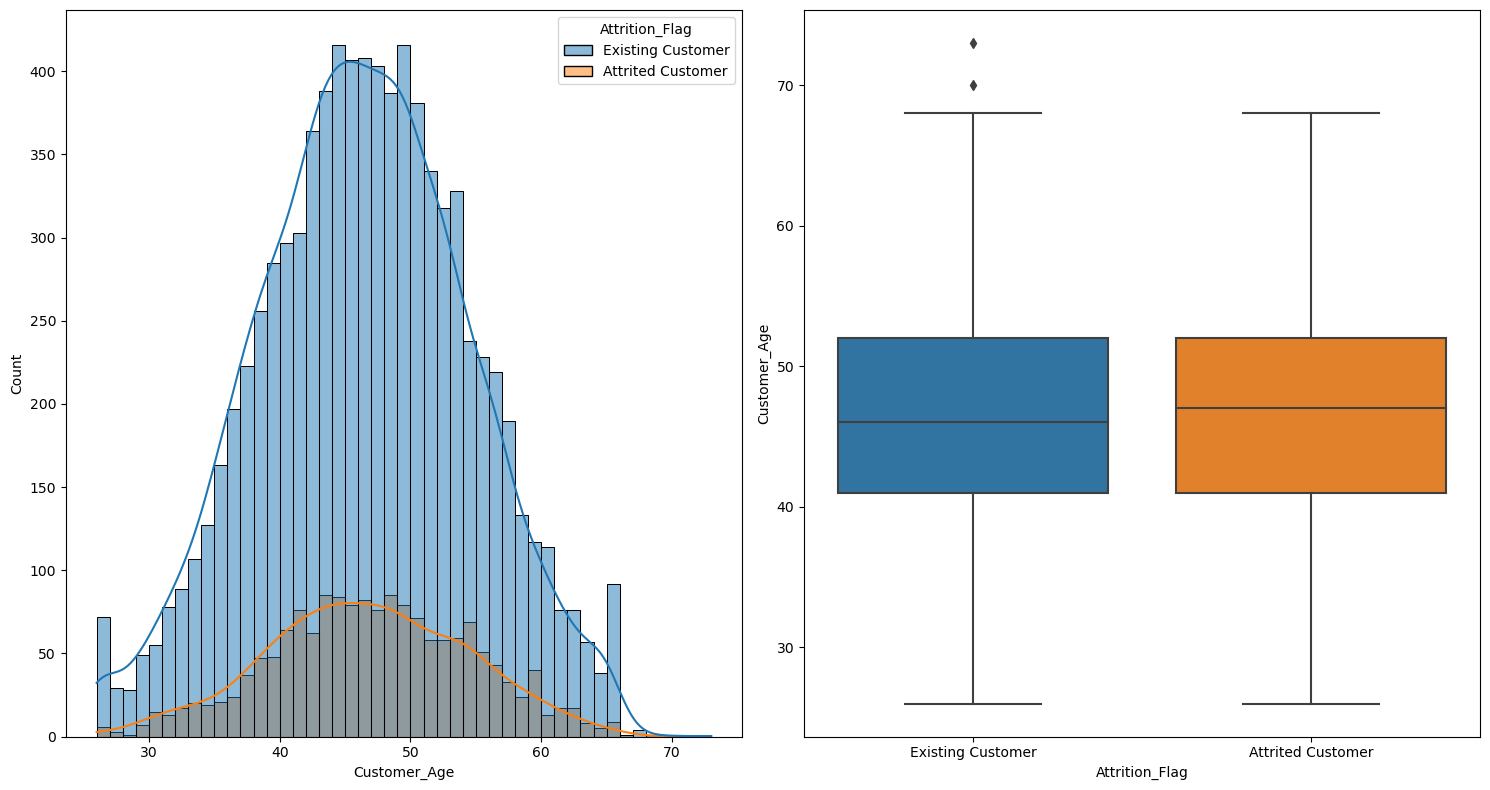

In [28]:
plot_num_col(df,'Customer_Age')

	** COLUMN NAME : Credit_Limit **



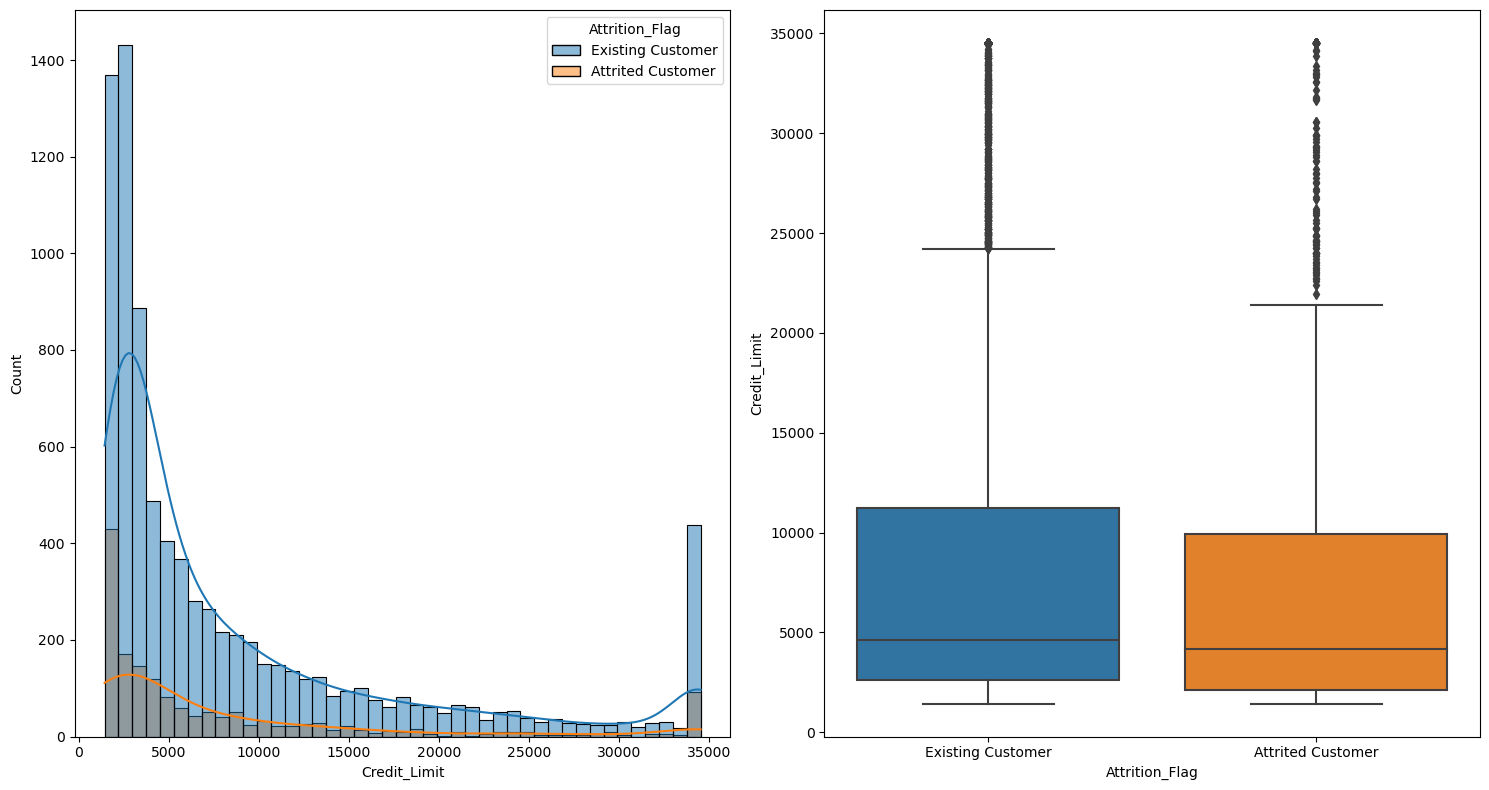

In [29]:
plot_num_col(df,'Credit_Limit')

	** COLUMN NAME : Months_on_book **



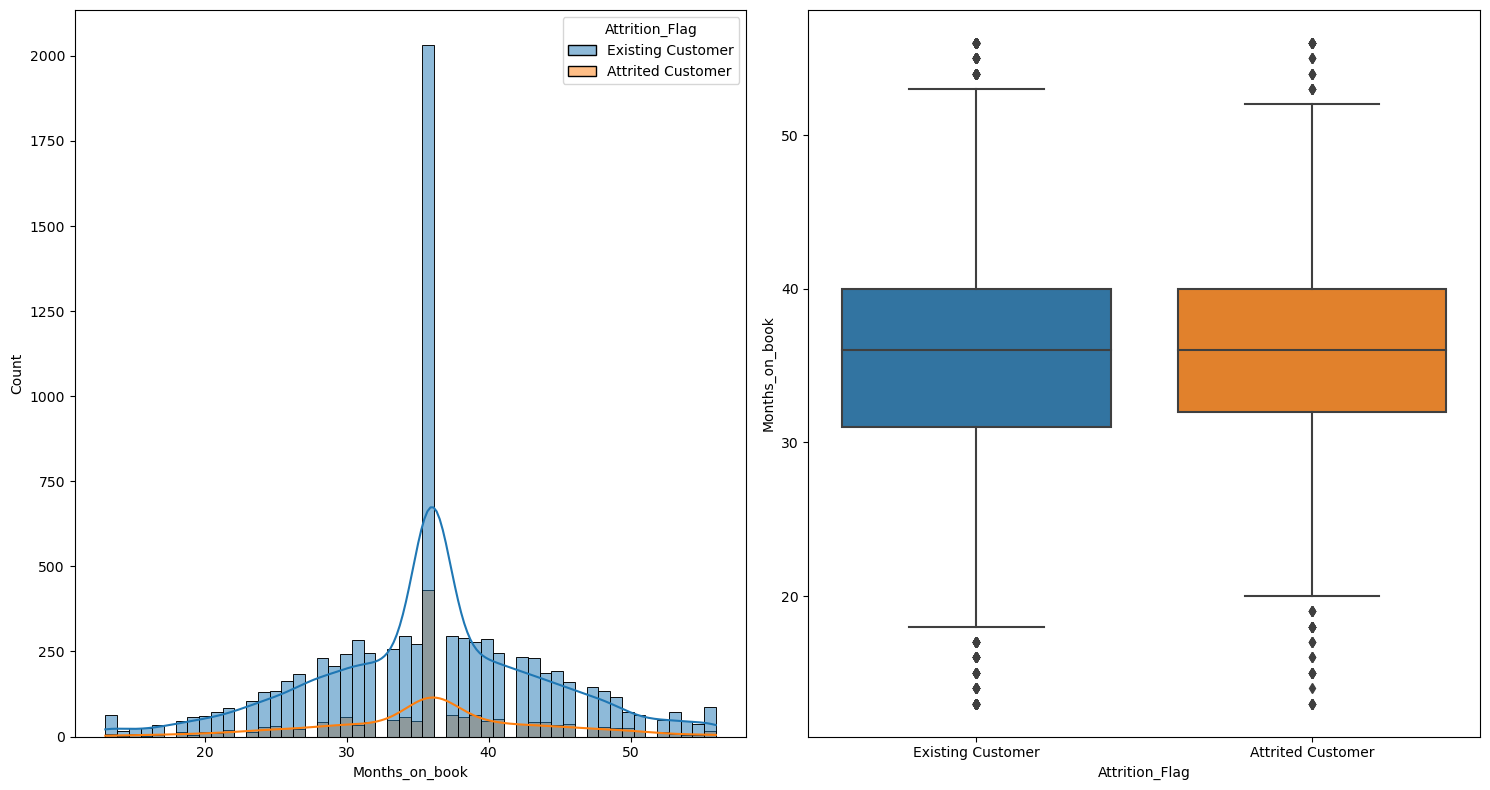

In [30]:
plot_num_col(df,'Months_on_book')

	** COLUMN NAME : Total_Revolving_Bal **



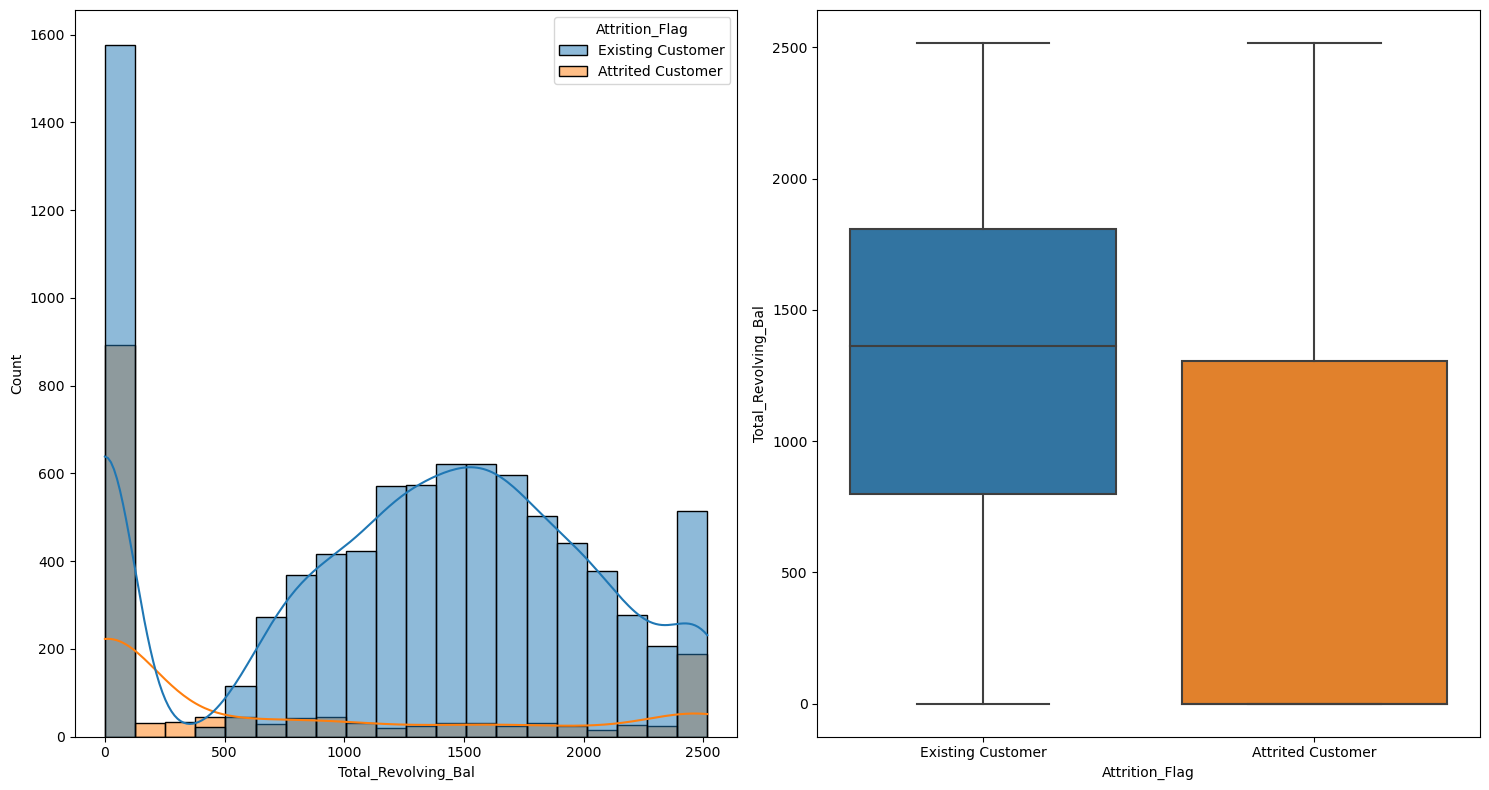

In [31]:
plot_num_col(df,'Total_Revolving_Bal')

	** COLUMN NAME : Total_Trans_Amt **



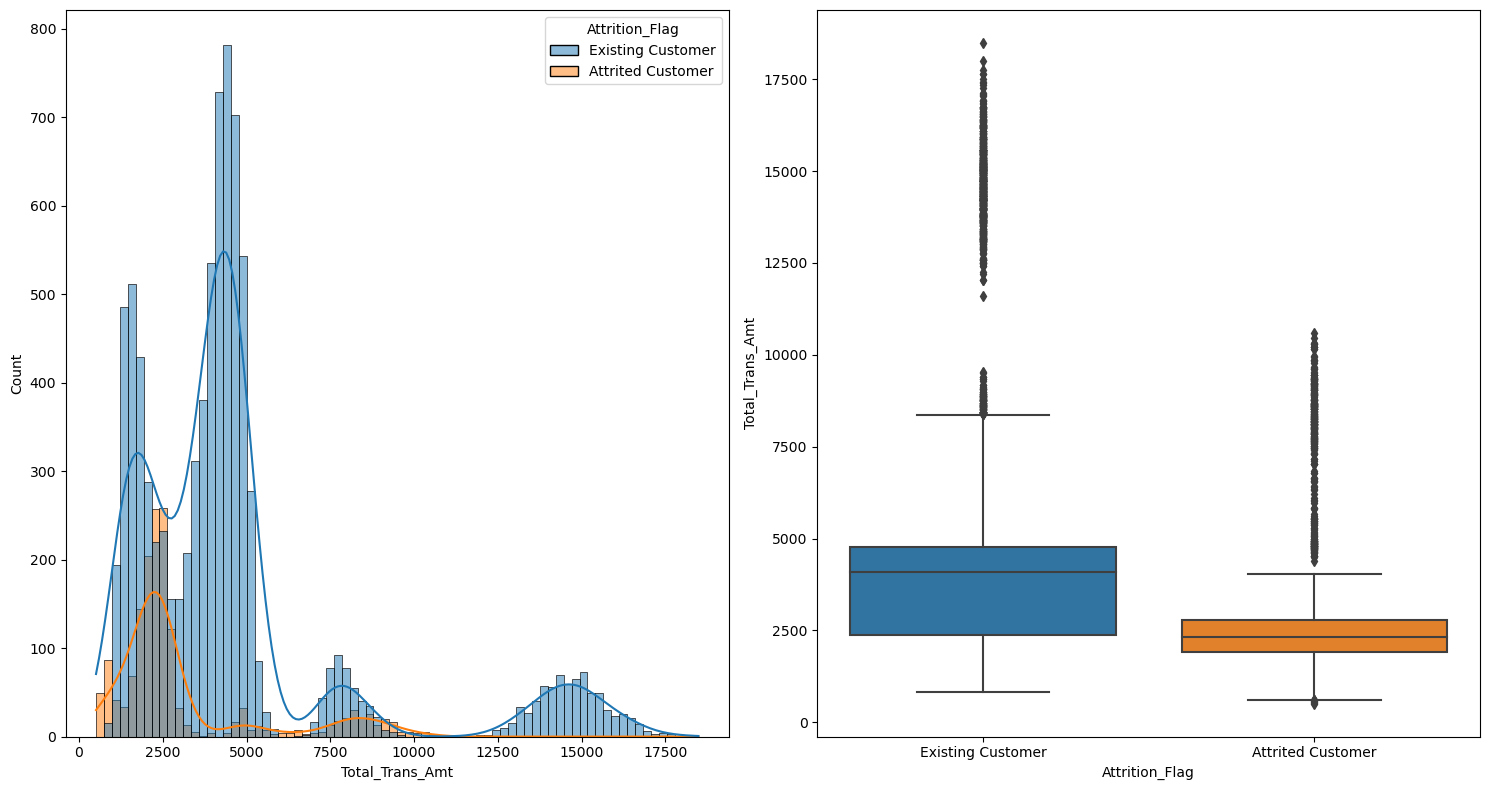

In [32]:
plot_num_col(df,'Total_Trans_Amt')

	** COLUMN NAME : Avg_Open_To_Buy **



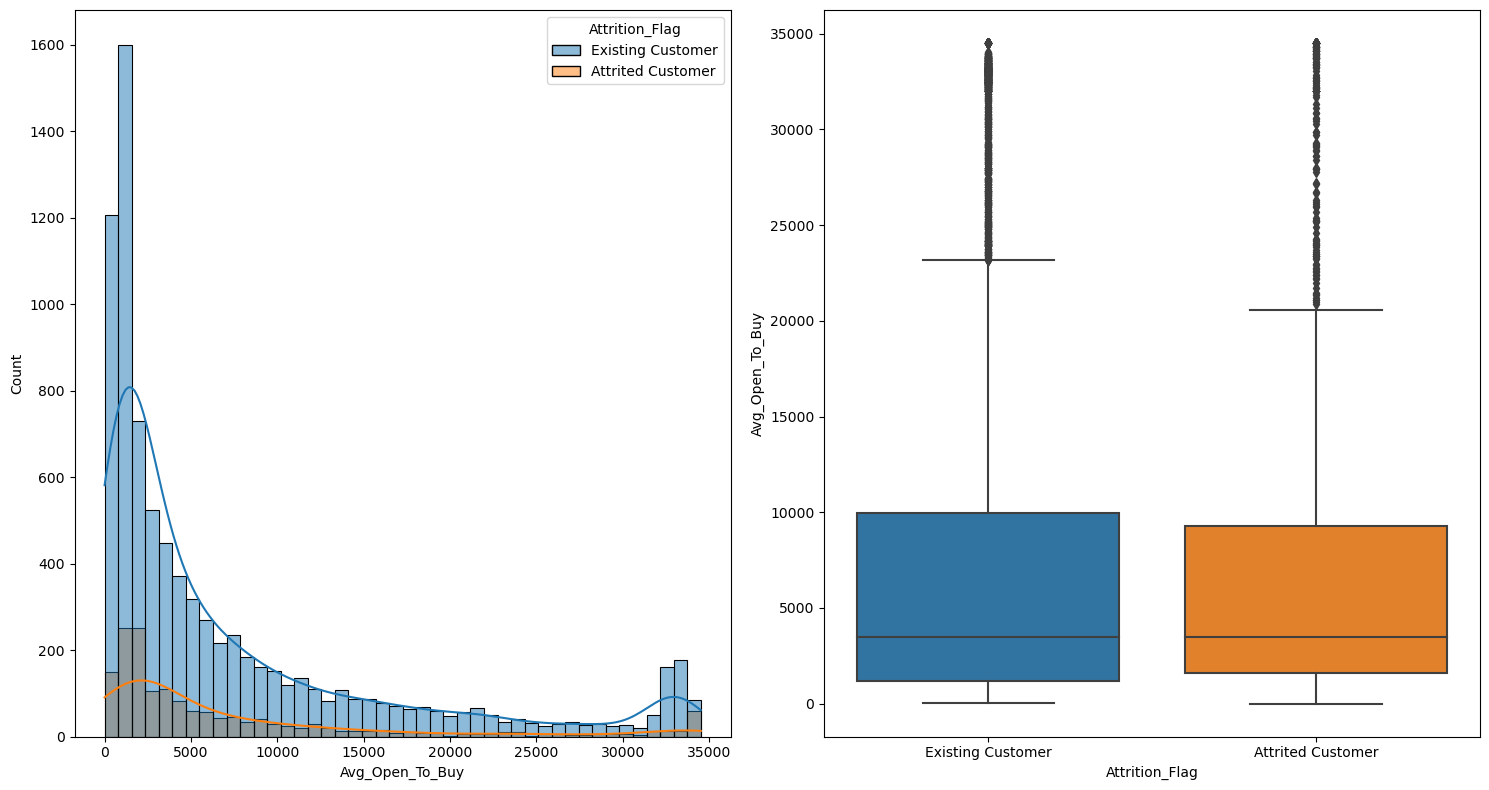

In [33]:
plot_num_col(df,'Avg_Open_To_Buy')

	** COLUMN NAME : Total_Trans_Ct **



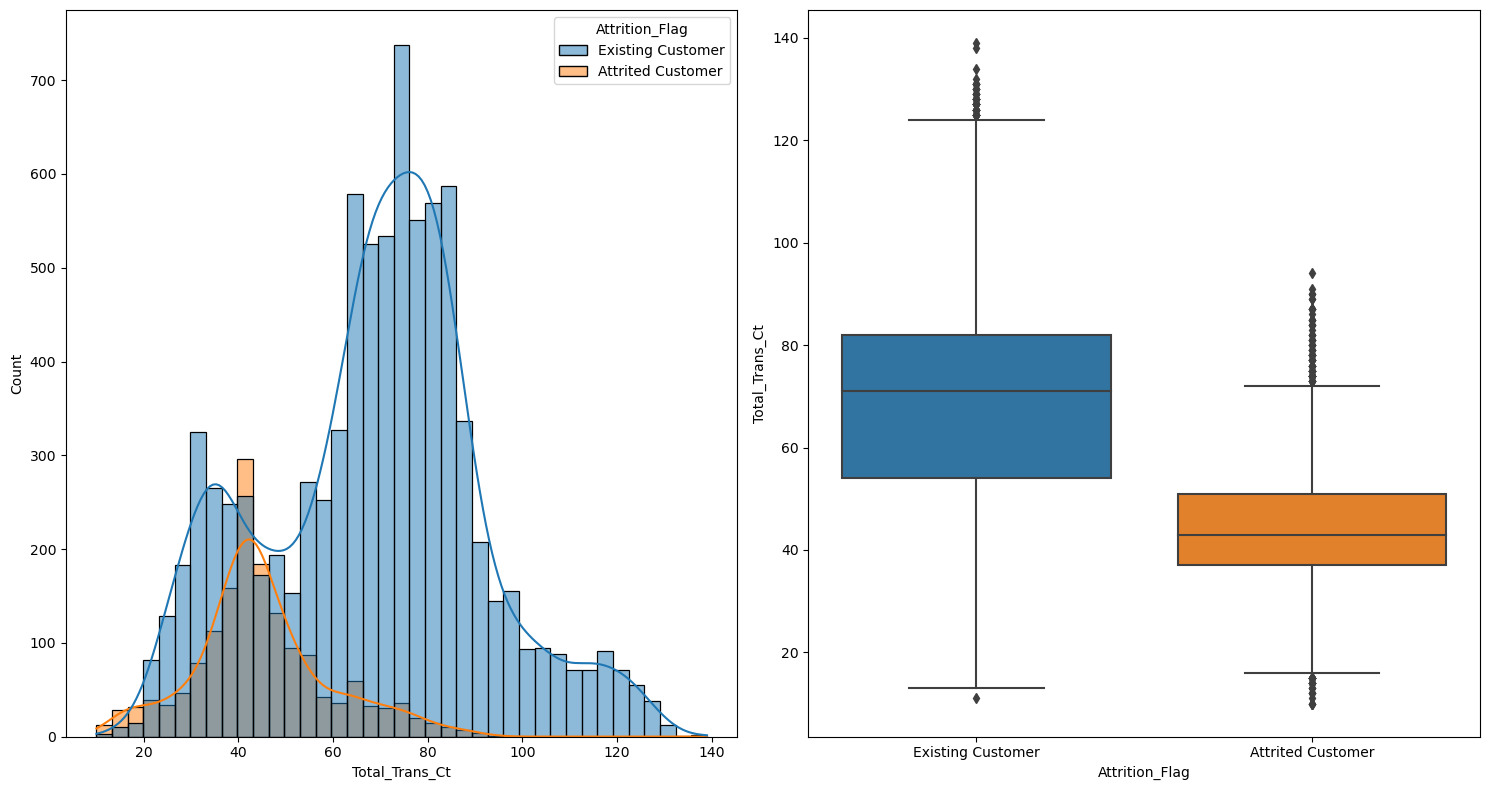

In [34]:
plot_num_col(df,'Total_Trans_Ct')

	** COLUMN NAME : Total_Amt_Chng_Q4_Q1 **



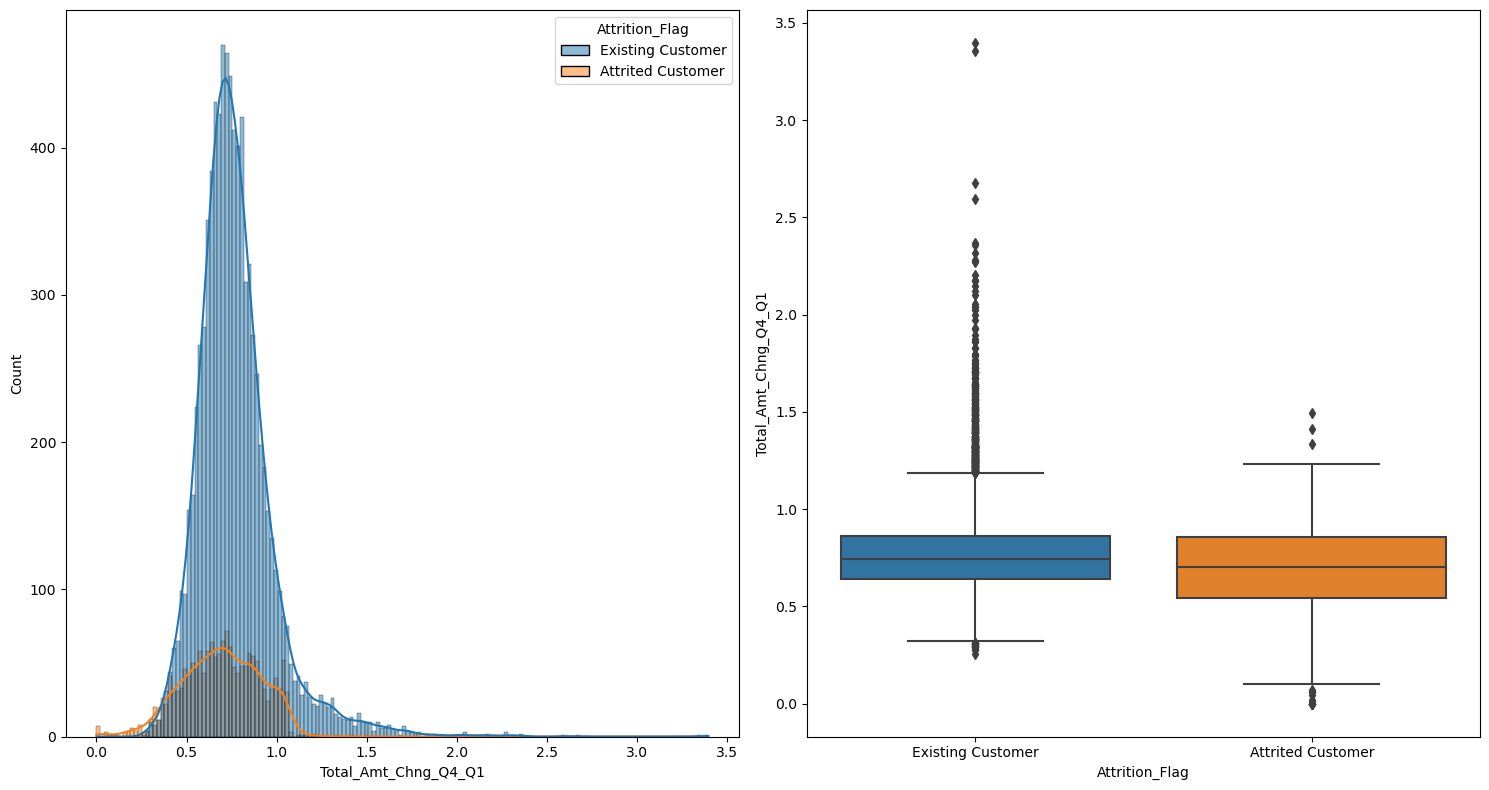

In [35]:
plot_num_col(df,'Total_Amt_Chng_Q4_Q1')

	** COLUMN NAME : Total_Ct_Chng_Q4_Q1 **



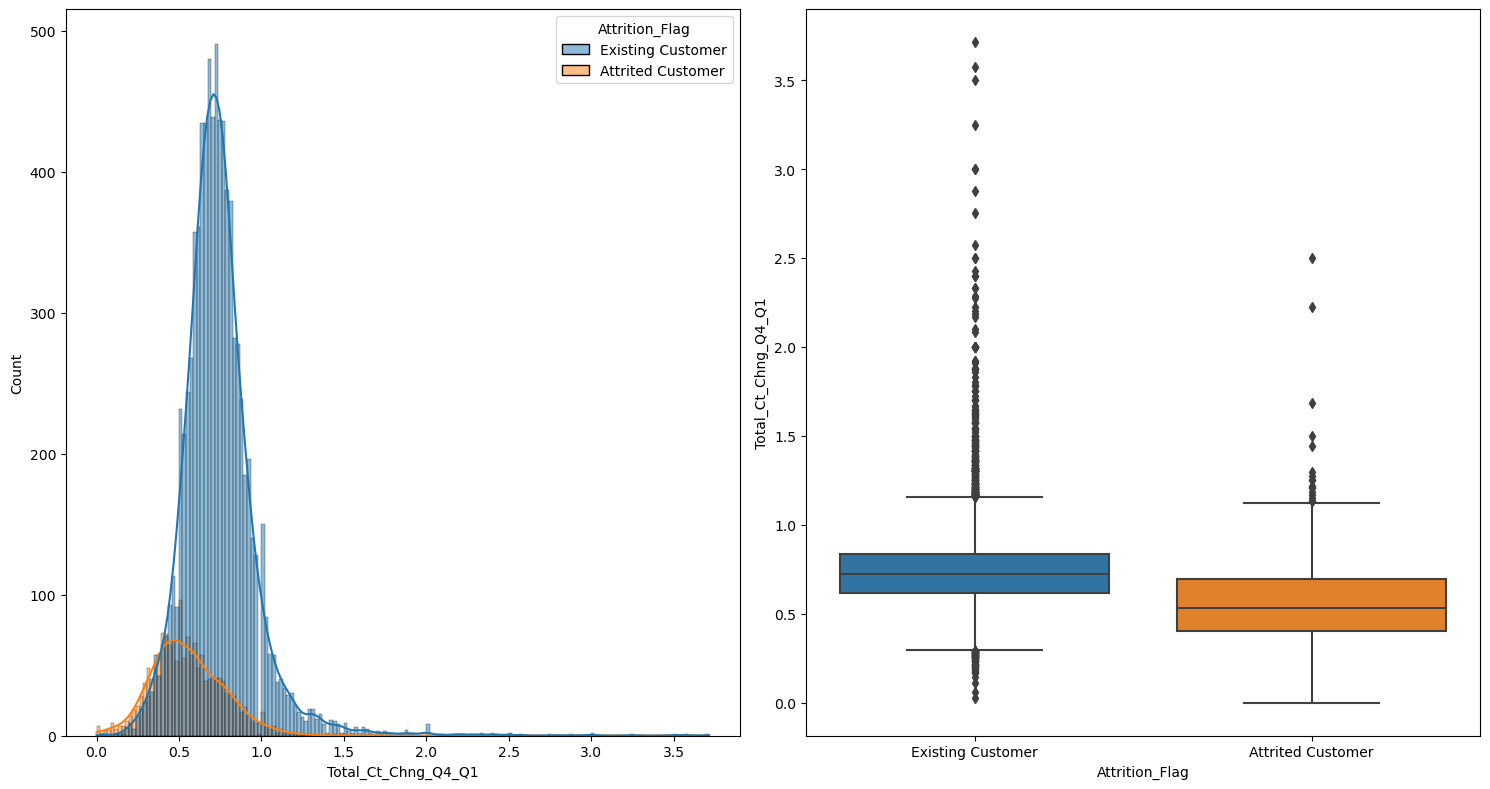

In [36]:
plot_num_col(df,'Total_Ct_Chng_Q4_Q1')

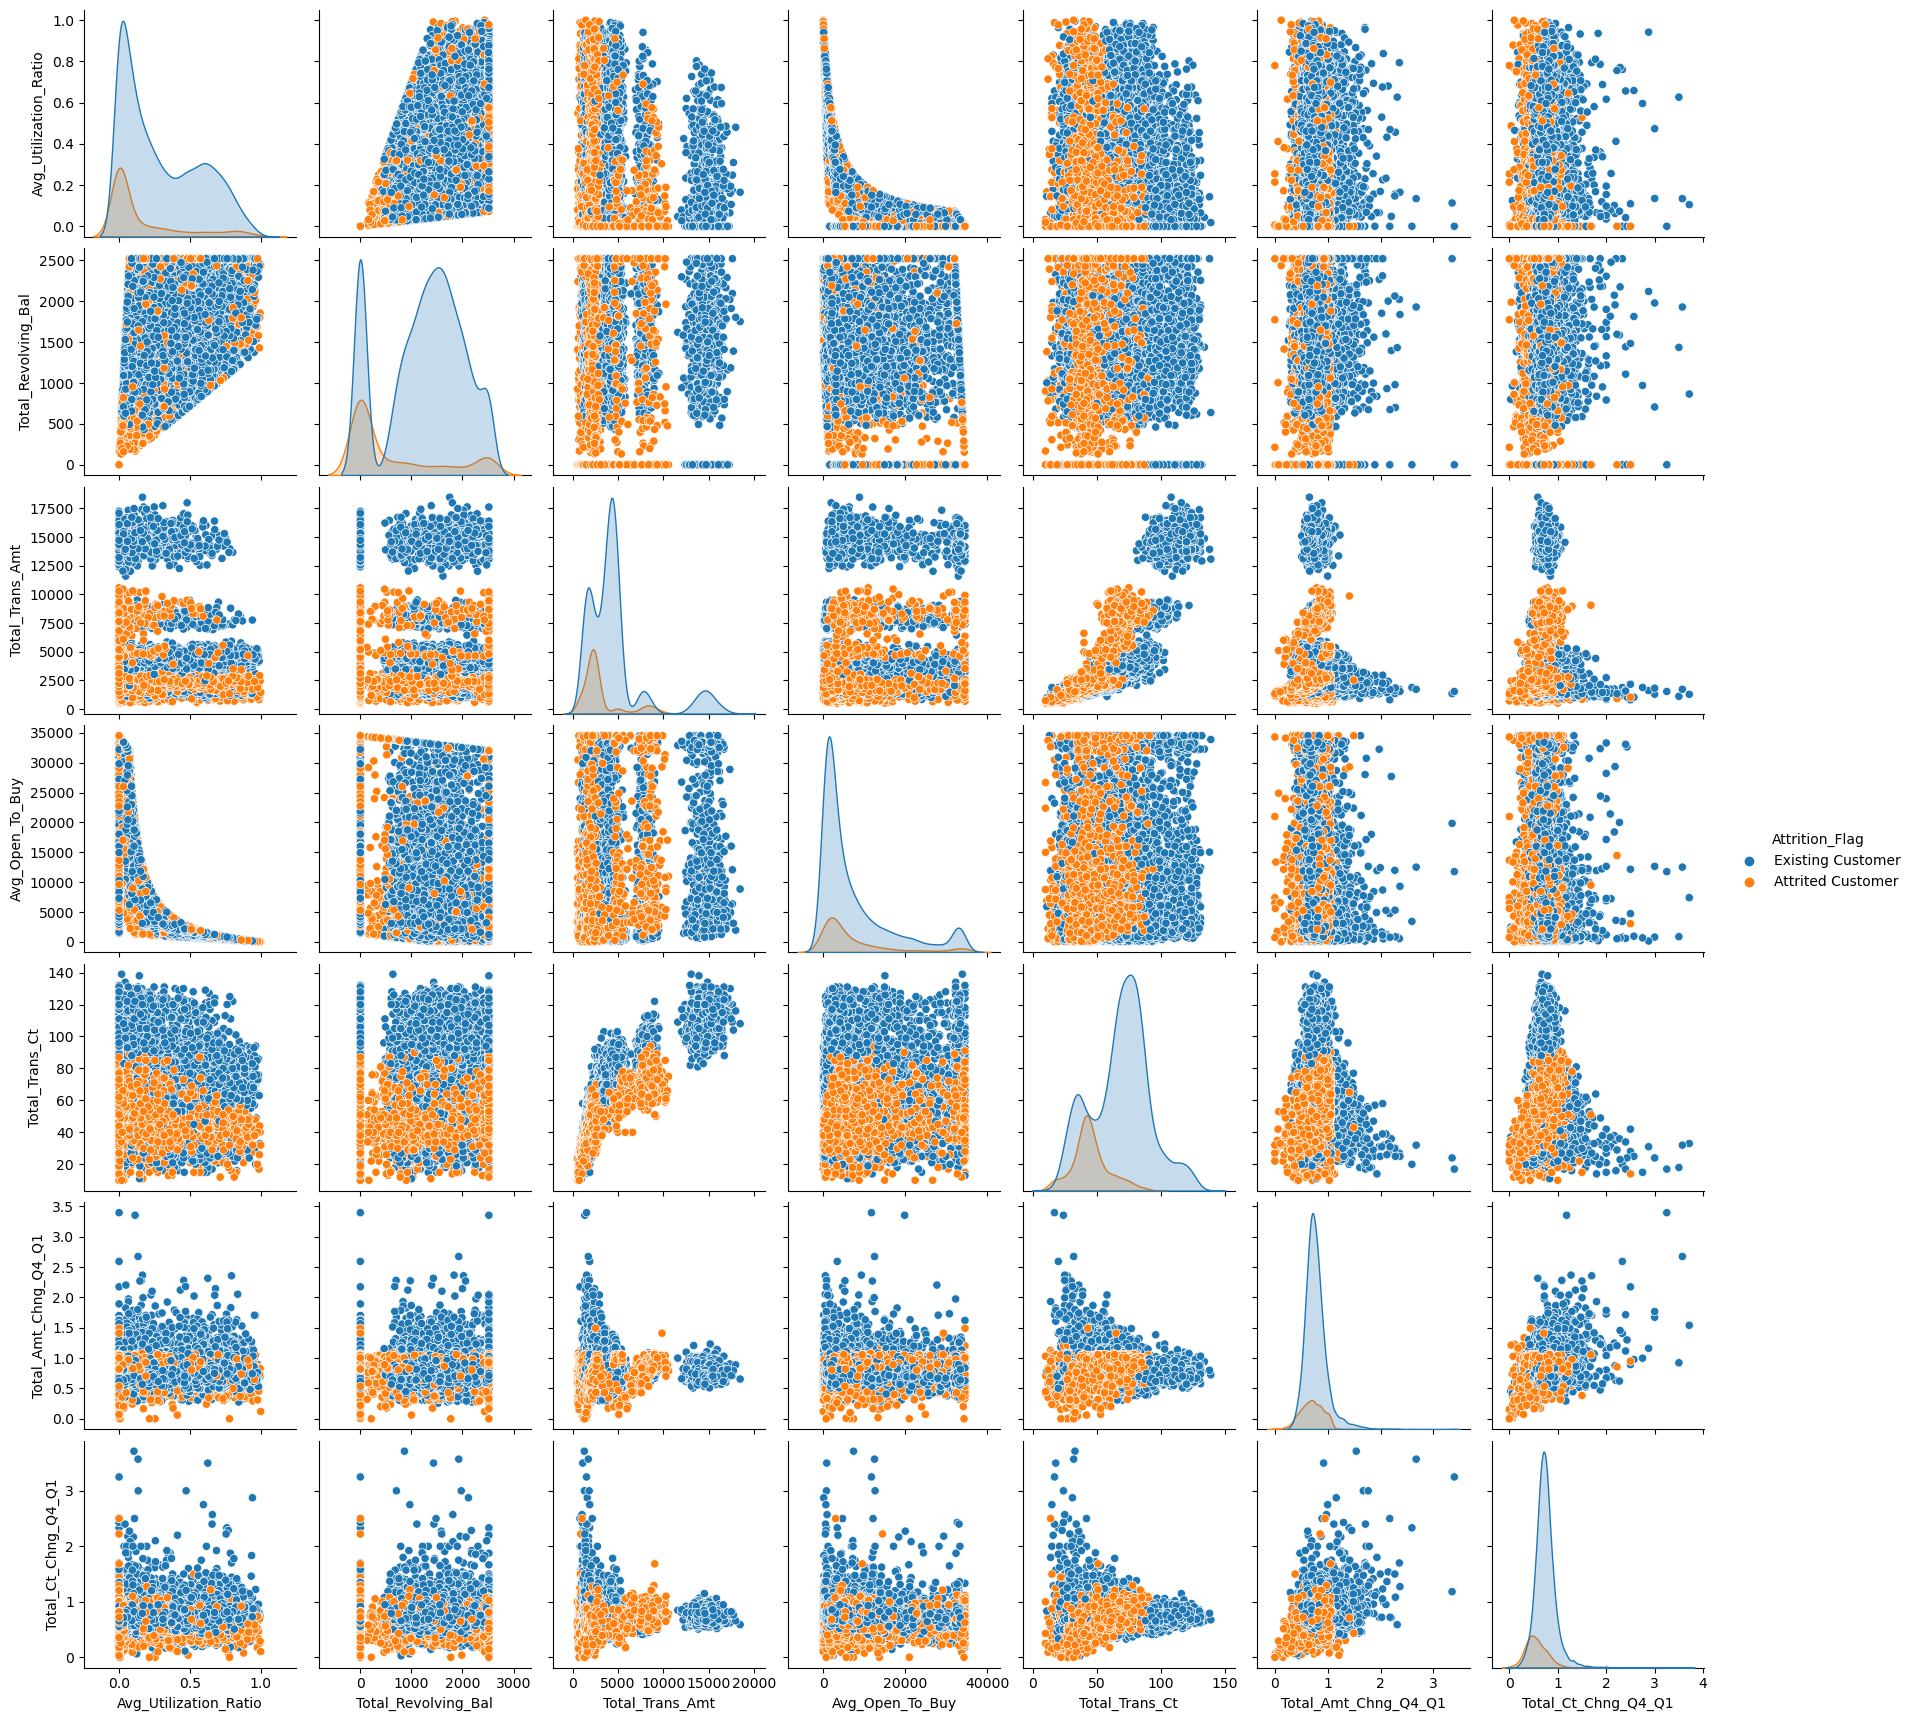

In [37]:
col=['Avg_Utilization_Ratio','Total_Revolving_Bal','Total_Trans_Amt',
     'Avg_Open_To_Buy','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
     'Attrition_Flag']
sns.pairplot(df[col],hue='Attrition_Flag')

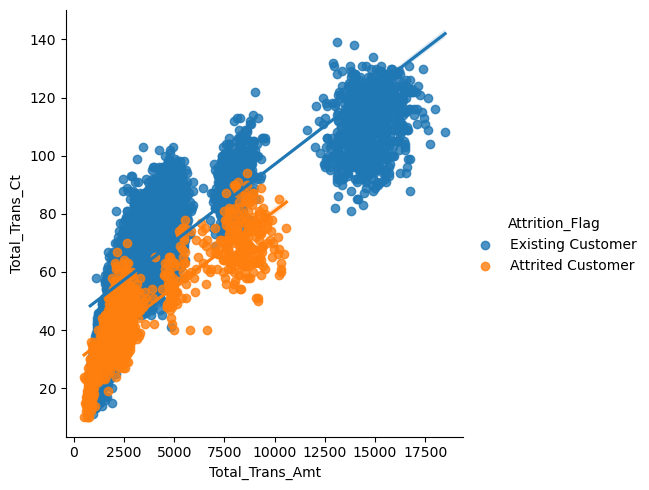

In [38]:
sns.lmplot(x='Total_Trans_Amt',y='Total_Trans_Ct',hue='Attrition_Flag',data=df)

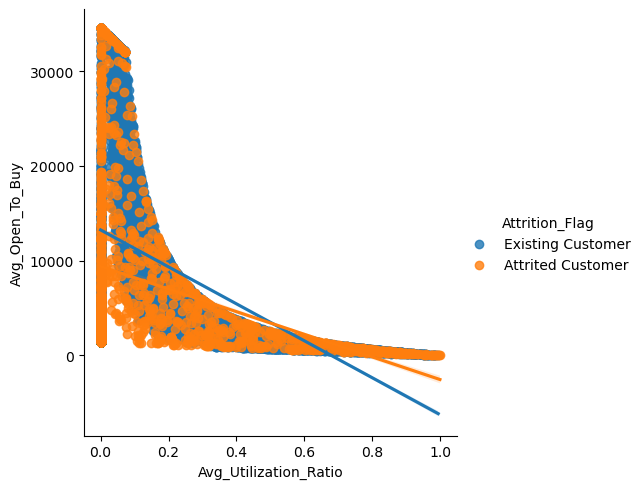

In [39]:
sns.lmplot(x='Avg_Utilization_Ratio',y='Avg_Open_To_Buy',hue='Attrition_Flag',data=df);

- There are non-linear relationship between target variable and input variable, also many input variables doesn't have gaussian distribution.
- Total_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio seems to have effect on determining whether a customer leave service or not.

- While Age and month_on_book variable seems irrevalant to decision whether a customer leave service or not.

In [40]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

# Data preprocessing

In [39]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

In [81]:
X=df.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y=df['Attrition_Flag'].replace(to_replace=['Existing Customer','Attrited Customer'],value=[1,0])

In [85]:
cat_col=X.select_dtypes(include='object').columns
cat_col

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [86]:
X_cat=pd.get_dummies(X[cat_col],drop_first=True)
X_cat.head(2)

Gender_M  Education_Level_Doctorate  Education_Level_Graduate  \
0         1                          0                         0   
1         0                          0                         1   

   Education_Level_High School  Education_Level_Post-Graduate  \
0                            1                              0   
1                            0                              0   

   Education_Level_Uneducated  Education_Level_Unknown  \
0                           0                        0   
1                           0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  \
0                       1                      0                       0   
1                       0                      1                       0   

   Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                            0                            1   
1                            0                            0   

   Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0                             0                               0   
1                             0                               1   

   Income_Category_Unknown  Card_Category_Gold  Card_Category_Platinum  \
0                        0                   0                       0   
1                        0                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0

In [87]:
num_col=X.select_dtypes(exclude='object').columns
num_col

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [88]:
transformer=PowerTransformer()
X_num=transformer.fit_transform(X[num_col])
X_num=pd.DataFrame(X_num,columns=num_col)
X_num.head(2)

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0       -16.84%           51.63%          37.11%                    76.23%   
1        33.11%          198.00%         101.51%                   141.71%   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                -145.83%                 49.59%        96.28%   
1                -145.83%                -40.61%        56.65%   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0               -0.38%           93.03%               225.94%   
1                7.62%           55.42%               280.35%   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0         -182.07%         -96.42%              301.63%                -76.80%  
1         -160.57%        -139.71%              601.10%                -49.74%

In [89]:
X=pd.concat([X_cat,X_num],axis=1)
X.head(3)

Gender_M  Education_Level_Doctorate  Education_Level_Graduate  \
0         1                          0                         0   
1         0                          0                         1   
2         1                          0                         1   

   Education_Level_High School  Education_Level_Post-Graduate  \
0                            1                              0   
1                            0                              0   
2                            0                              0   

   Education_Level_Uneducated  Education_Level_Unknown  \
0                           0                        0   
1                           0                        0   
2                           0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  ...  \
0                       1                      0                       0  ...   
1                       0                      1                       0  ...   
2                       1                      0                       0  ...   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                -145.83%                 49.59%        96.28%   
1                -145.83%                -40.61%        56.65%   
2                -145.83%               -224.68%       -41.70%   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0               -0.38%           93.03%               225.94%   
1                7.62%           55.42%               280.35%   
2             -166.61%           -4.16%               465.43%   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0         -182.07%         -96.42%              301.63%                -76.80%  
1         -160.57%        -139.71%              601.10%                -49.74%  
2          -95.33%        -207.83%              435.95%               -120.17%  

[3 rows x 32 columns]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=1234)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(8101, 32) (8101,)
(2026, 32) (2026,)


# Evaluation Metric

- We will use precision recall curve auc(area under curve) score to evaluate models performances because The positive class is more important than negative class, because misclassifying postive example as nagative example result in loss of business.

y_train => existing customer (1), Attrited Customer (0)

In [91]:
from sklearn.metrics import precision_recall_curve,auc
from sklearn.metrics import make_scorer

def auc_score(y_true,y_probs):
    precision,recall,_=precision_recall_curve(y_true,y_probs)
    return auc(recall,precision)

metric=make_scorer(auc_score,needs_proba=True)

# Feature Selection
- Feature selection using feature importance method that uses estimator to determine the importance of the variable in determining the value of target variable.
- Because the data contains non-linear,multi-variate complex relations we will use random forest and xgboost.

In [92]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [93]:
fs_rf=SelectFromModel(RandomForestClassifier()).fit(X_train,y_train)
imp_rf=pd.Series(fs_rf.estimator_.feature_importances_,index=X_train.columns).sort_values(ascending=False)

<AxesSubplot:>

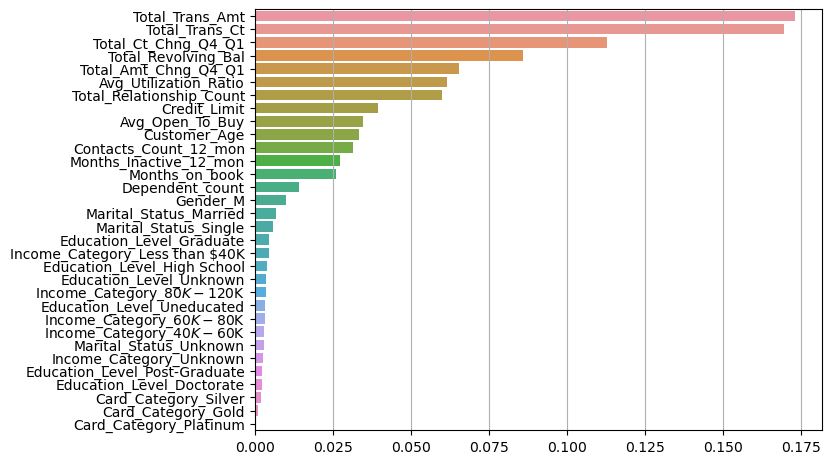

In [124]:
plt.grid()
plt.tight_layout()
sns.barplot(y=imp_rf.index,x=imp_rf.values)

In [95]:
fs_xgb=SelectFromModel(XGBClassifier()).fit(X_train,y_train)
imp_xgb=pd.Series(fs_xgb.estimator_.feature_importances_,index=X_train.columns).sort_values(ascending=False)

<AxesSubplot:>

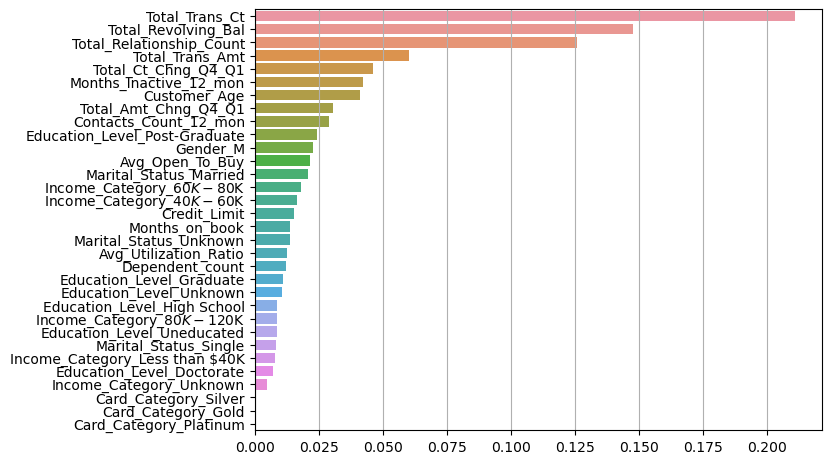

In [125]:
plt.grid()
plt.tight_layout()
sns.barplot(y=imp_xgb.index,x=imp_xgb.values)

- Both Methods supports our findings from data visualization section. 
- Random forest method features are more in line with the finding therefore we will rf as SelectFromModel estimator.**

In [97]:
features= ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
           'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1',
           'Total_Relationship_Count', 'Avg_Open_To_Buy', 'Credit_Limit',
           'Customer_Age', 'Contacts_Count_12_mon', 'Months_on_book',
           'Months_Inactive_12_mon', 'Dependent_count'] 

In [98]:
X_train=X_train[features]
X_test=X_test[features]

# Test with different Algorithms

In [99]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [100]:
def get_models():
    
    models=[]
    names=[]
    
    models.append(LogisticRegression())
    names.append('lr')               
                  
    models.append(KNeighborsClassifier())
    names.append('knn')
    
    models.append(SVC(probability=True))
    names.append('svc')
    
    models.append(RandomForestClassifier())
    names.append('rf')
    
    models.append(AdaBoostClassifier())
    names.append('adb')
    
    models.append(XGBClassifier())
    names.append('xgb')

    return models,names

In [103]:
def evaluate(X,y):
    
    models,names=get_models()
    results=[]
    
    for i in range(len(models)):
        cv=StratifiedKFold(n_splits=5)
        scores=cross_val_score(models[i],X,y,scoring=metric,cv=cv)
        
        results.append(scores)
    plt.grid()   
    plt.boxplot(results,labels=names,showmeans=True);

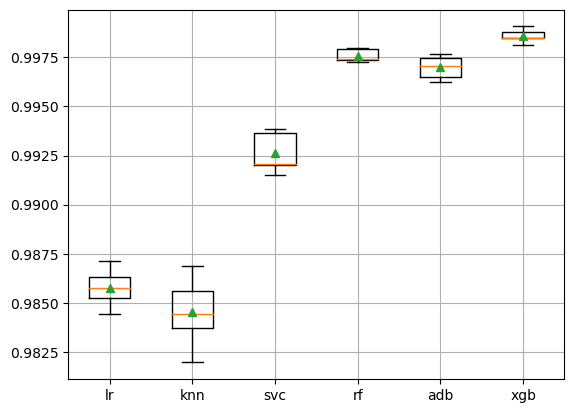

In [104]:
evaluate(X_train,y_train)

xgb  gave the best result

# Balance Class Distribution

In [106]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 1.2 MB/s eta 0:00:00m eta 0:00:010:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [107]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

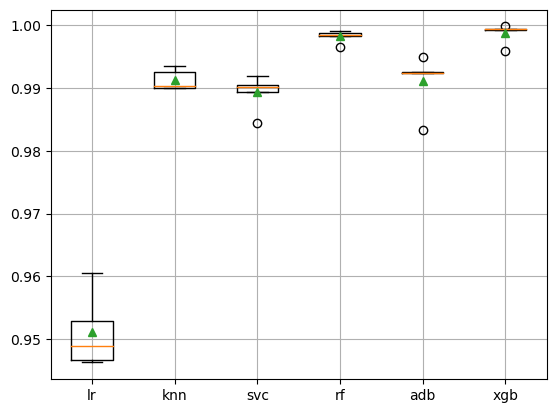

In [108]:
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
X_rs,y_rs=resample.fit_resample(X_train,y_train)

evaluate(X_rs,y_rs)

data resampling was done to address class imbalance ,  as the graph shows it has outclassed the previous results
so we will be using it

In [109]:
X_train,y_train=resample.fit_resample(X_train,y_train)

# Final Model

In [110]:
model=XGBClassifier()
model.fit(X_train,y_train)
y_probs=model.predict_proba(X_test)

In [111]:
precision,recall,thresholds=precision_recall_curve(y_test,y_probs[:,1])
print(f'Area under precision_recall_curve: {auc(recall,precision)}')


Area under precision_recall_curve: 0.998742333303288


Text(42.597222222222214, 0.5, 'Precision')

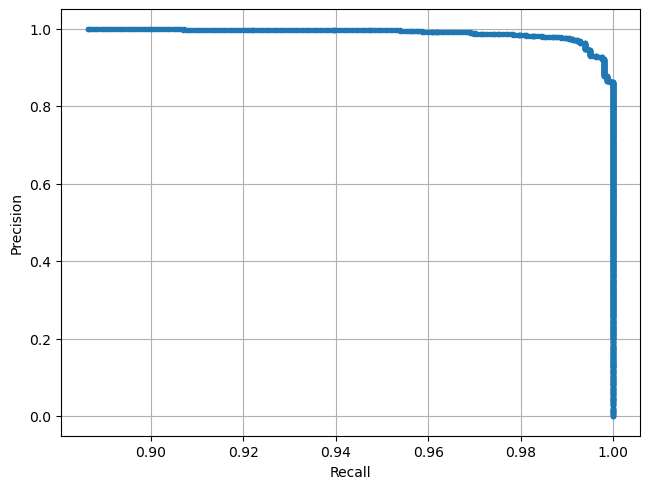

In [127]:
plt.plot(precision,recall, marker='.', label='Xgboost');

plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')

In [114]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [115]:
f1_score = (2*precision*recall)/(precision+recall)
ix = np.argmax(f1_score)
thresh=thresholds[ix]

print('Best Threshold=%f, f1_score=%.3f' % (thresholds[ix], f1_score[ix]))

Best Threshold=0.641771, f1_score=0.983


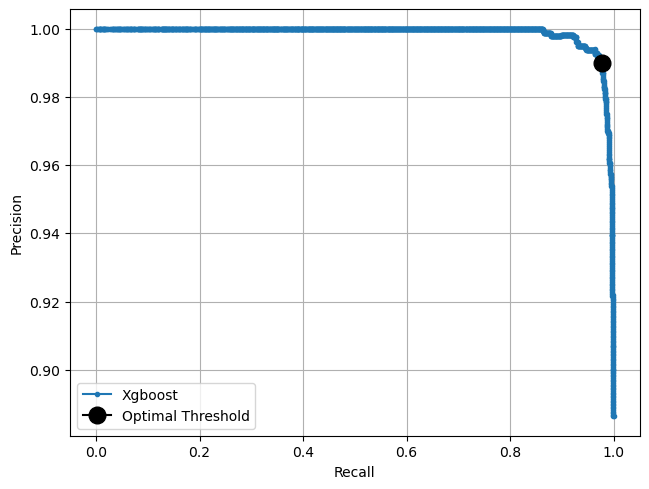

In [128]:
plt.plot(recall, precision, marker='.', label='Xgboost');
plt.plot(recall[ix],precision[ix],marker='o', markersize=12,color='black',label='Optimal Threshold');

plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()

In [129]:
y_pred=(y_probs[:,1]>=thresh)

In [130]:
print(f'Classification_report: \n\n {classification_report(y_test,y_pred)}')

Classification_report: 

               precision    recall  f1-score   support

           0       0.89      0.95      0.92       325
           1       0.99      0.98      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.94      0.96      0.95      2026
weighted avg       0.97      0.97      0.97      2026



Text(33.222222222222214, 0.5, 'True Label')

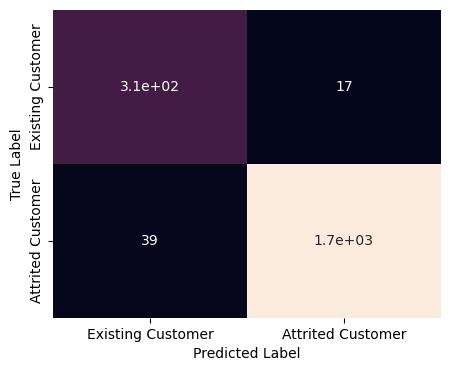

In [136]:
val=['Existing Customer','Attrited Customer']
data=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=val,index=val)

plt.figure(figsize=(5,4))

sns.heatmap(data,annot=True,cbar=False);
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [143]:
# Save the model
model.save_model('model/mode_xgb.model')
# Save as JSON file
model.save_model("model/mode_xgb.json")